### Introduction to TensorFlow Basic syntax


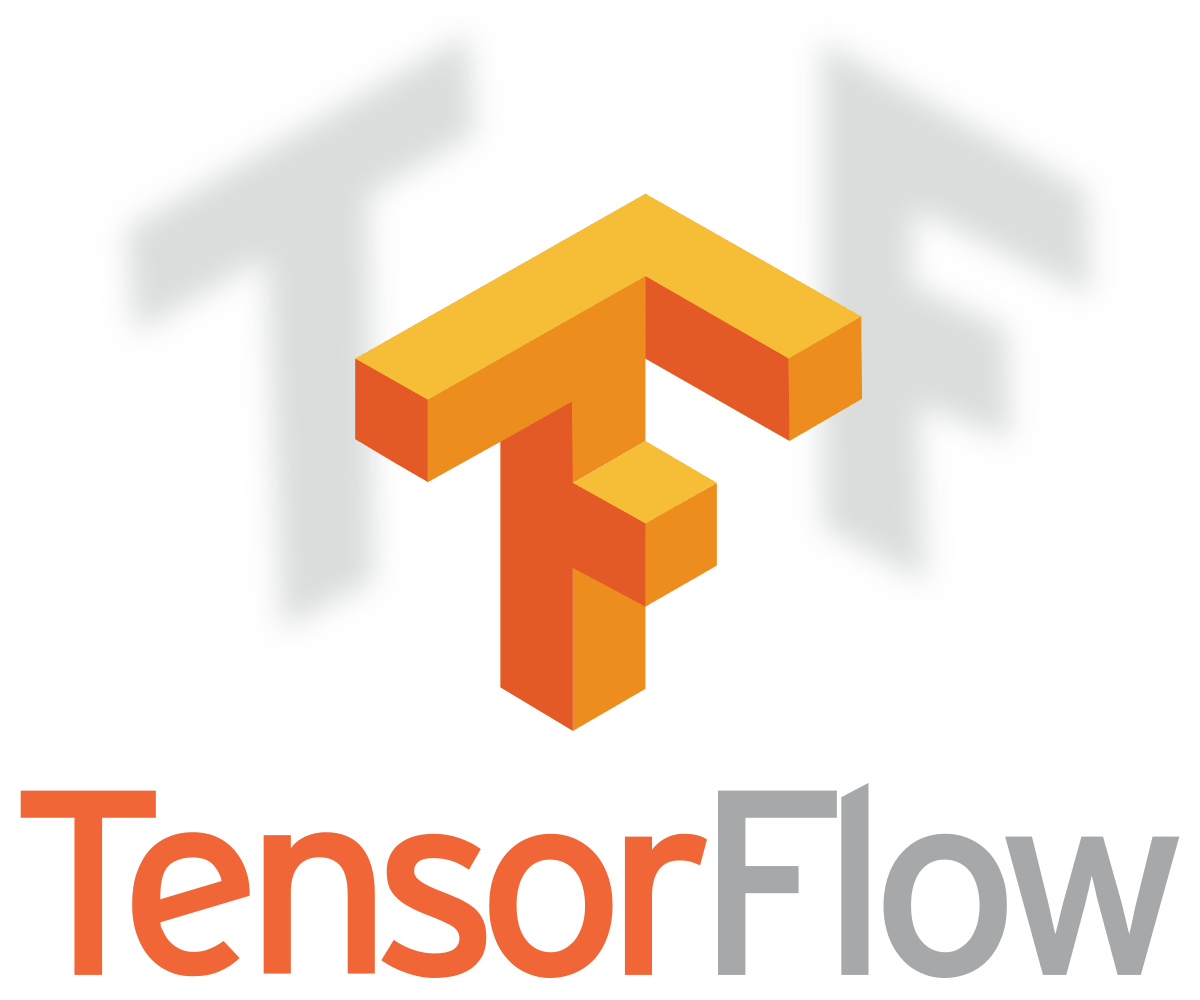

#### 1. Importing TensorFlow

The first step in any TensorFlow project is to import the library

In [23]:
import tensorflow as tf 

Check available devices you are using

In [32]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


This line gives access to all the TensorFlow functionalities. 

#### 2. Creating Tensors

##### 2.1 Creating constant Tensors

In [24]:
x = tf.constant([1,2,3,4,5])
print(x)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [25]:
# constant is a tensor that is immutable (unchangeable) once created.
x[1] = 5 # This will cause an error because you cannot change the value of a constant tensor.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

##### 2.2 Creating Variable Tensors

In [ ]:
y = tf.Variable([1,2,3,4,5])
print(y)

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([1, 2, 3, 4, 5])>


In [ ]:
# Variable is a tensor that is mutable (changeable).
y[0].assign(5) # This will not cause an error because you can change the value of a variable tensor.
print(y)

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([5, 2, 3, 4, 5])>


##### 2.3 Creating Ragged tensors

In [37]:
# Creating a ragged tensor
ragged_tensor = tf.ragged.constant([
    [1, 2, 3],
    [4, 5],
    [6, 7, 8, 9]
])
print("Ragged tensor:")
print(ragged_tensor)

# Displaying the shape of the ragged tensor
print("\nShape of the ragged tensor:")
print(ragged_tensor.shape)


Ragged tensor:
<tf.RaggedTensor [[1, 2, 3], [4, 5], [6, 7, 8, 9]]>

Shape of the ragged tensor:
(3, None)


##### 2.4 Creating Sparce tensors

In [38]:
# Creating a sparse tensor
sparse_tensor = tf.sparse.SparseTensor(
    indices=[[0, 0], [1, 2], [2, 3]],
    values=[1, 2, 3],
    dense_shape=[3, 4]
)

print("Sparse tensor:")
print(sparse_tensor)

# Converting sparse tensor to dense tensor
dense_tensor = tf.sparse.to_dense(sparse_tensor)
print("\nDense representation of the sparse tensor:")
print(dense_tensor)


Sparse tensor:
SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 2 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

Dense representation of the sparse tensor:
tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 3]], shape=(3, 4), dtype=int32)


#### 3.Tensor filled with zeros or ones

In [ ]:
# this creates a tensor with all elements as zero   
zeros_tensor = tf.zeros([2,3])
# this creates a tensor with all elements as one
ones_tensor = tf.ones([2,3])
print(zeros_tensor)
print(ones_tensor) 

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


#### 4.Tensor filled with random numbers

In [ ]:
# this creates a tensor with all elements as random numbers from a normal distribution.
random_tensor = tf.random.normal([2,3])
print(random_tensor)

tf.Tensor(
[[0.9386998  0.8399315  1.4895531 ]
 [0.13330396 1.9353737  0.9452338 ]], shape=(2, 3), dtype=float32)


#### 5.Operations on Tensors

In [ ]:
# Tensor Element-wise additions
z = tf.add(x,y)
print(z)

tf.Tensor([ 2  4  6  8 10], shape=(5,), dtype=int32)


What if we want to add the vector y after modifying it as y = tf.Variable([1,2,3,4,5,6])
this will yealds an Incompatible shapes error: [5] vs. [6]

In [ ]:
# Tensor Element-wise subtraction
z = tf.subtract(x,y)
print(z)

tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int32)


In [ ]:
# Tensor Element-wise Multiplication
z = tf.multiply(x,y)
print(z)
# Tensor Element-wise Division
z = tf.divide(x,y)
print(z)

tf.Tensor([ 1  4  9 16 25], shape=(5,), dtype=int32)
tf.Tensor([1. 1. 1. 1. 1.], shape=(5,), dtype=float64)


In [ ]:
m = tf.constant([1,3,5,7,9], dtype= tf.float16)
# Tensor Element-wise Square Root
# Note: This operation does not support integer types.
z = tf.sqrt(m)
print(z)
# Tensor Element-wise Exponential
z = tf.exp(m)
print(z)

tf.Tensor([1.    1.732 2.236 2.646 3.   ], shape=(5,), dtype=float16)
tf.Tensor([2.719e+00 2.008e+01 1.484e+02 1.097e+03 8.104e+03], shape=(5,), dtype=float16)


In [ ]:
# Tensor matrix multiplicatin of rank >= 2 where the inner 2 dimensions specify valid matrix multiplication dimensions
k = tf.constant([[1,3],[6,8]])
l = tf.constant([[9,3],[3,7]])
print(tf.matmul(k,l)) # We can also us the @ symbol for matrix multiplication as we do usually in numpy


tf.Tensor(
[[18 24]
 [78 74]], shape=(2, 2), dtype=int32)


#### 6. TensorFlow Broadcasting

In [54]:
# Broadcasting examples in TensorFlow

# Case 1: Broadcasting with different ranks
a = tf.constant([1, 2, 3], shape=[3])  # 1D tensor with shape [3]
b = tf.constant([[1], [2], [3]], shape=[3, 1])  # 2D tensor with shape [3, 1]
result_1 = a + b
print("Case 1 - Different ranks:")
print(result_1)
# How it works: 'a' is broadcasted to shape [3, 1], then element-wise addition is performed

# Case 2: Broadcasting with compatible dimensions
c = tf.constant([[1, 2, 3], [4, 5, 6]], shape=[2, 3])  # 2D tensor with shape [2, 3]
d = tf.constant([10, 20, 30], shape=[3])  # 1D tensor with shape [3]
result_2 = c * d
print("\nCase 2 - Compatible dimensions:")
print(result_2)
# How it works: 'd' is broadcasted to shape [2, 3], then element-wise multiplication is performed

# Case 3: Broadcasting with dimension of size 1
e = tf.constant([[1], [2], [3]], shape=[3, 1])  # 2D tensor with shape [3, 1]
f = tf.constant([10, 20, 30], shape=[3])  # 1D tensor with shape [3]
result_3 = e * f
print("\nCase 3 - Dimension of size 1:")
print(result_3)
# How it works: 'e' is broadcasted to shape [3, 3], 'f' is broadcasted to [3, 3], then element-wise multiplication

# Case 4: Broadcasting in arithmetic operations
g = tf.constant([1, 2, 3], shape=[3])  # 1D tensor with shape [3]
h = tf.constant(10)  # Scalar (0D tensor)
result_4 = g + h
print("\nCase 4 - Arithmetic with scalar:")
print(result_4)
# How it works: 'h' is broadcasted to shape [3], then element-wise addition is performed

# Case 5: Broadcasting with higher dimensions
i = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]], shape=[2, 2, 2])  # 3D tensor with shape [2, 2, 2]
j = tf.constant([10, 20], shape=[2])  # 1D tensor with shape [2]
result_5 = i + j
print("\nCase 5 - Higher dimensions:")
print(result_5)
# How it works: 'j' is broadcasted to shape [2, 2, 2], then element-wise addition is performed


Case 1 - Different ranks:
tf.Tensor(
[[2 3 4]
 [3 4 5]
 [4 5 6]], shape=(3, 3), dtype=int32)

Case 2 - Compatible dimensions:
tf.Tensor(
[[ 10  40  90]
 [ 40 100 180]], shape=(2, 3), dtype=int32)

Case 3 - Dimension of size 1:
tf.Tensor(
[[10 20 30]
 [20 40 60]
 [30 60 90]], shape=(3, 3), dtype=int32)

Case 4 - Arithmetic with scalar:
tf.Tensor([11 12 13], shape=(3,), dtype=int32)

Case 5 - Higher dimensions:
tf.Tensor(
[[[11 22]
  [13 24]]

 [[15 26]
  [17 28]]], shape=(2, 2, 2), dtype=int32)


#### 7. Tensor Conversions (Type, ,Shape)

It is impoortant to note that tensorflow does not perform automatic type conversion for it just rais an exception if you try to perform an operation on tensors with incompatiable types

In [ ]:
# You can specify the tensor data type in it's diclaration syntax via the "dtype" param.
x = tf.constant(6.3, dtype= tf.float16)
y = tf.constant(2.3) 

In [35]:
# You can specify the tensor shape in it's diclaration syntax via the "shape" param.
x = tf.constant([6.3,4,5,6,7,8],shape=[2,3])
print(X)

tf.Tensor(
[[ 0.        ]
 [ 0.1010101 ]
 [ 0.2020202 ]
 [ 0.3030303 ]
 [ 0.4040404 ]
 [ 0.5050505 ]
 [ 0.6060606 ]
 [ 0.7070707 ]
 [ 0.8080808 ]
 [ 0.90909094]
 [ 1.010101  ]
 [ 1.1111112 ]
 [ 1.2121212 ]
 [ 1.3131313 ]
 [ 1.4141414 ]
 [ 1.5151515 ]
 [ 1.6161616 ]
 [ 1.7171717 ]
 [ 1.8181819 ]
 [ 1.919192  ]
 [ 2.020202  ]
 [ 2.121212  ]
 [ 2.2222223 ]
 [ 2.3232324 ]
 [ 2.4242425 ]
 [ 2.5252526 ]
 [ 2.6262627 ]
 [ 2.7272727 ]
 [ 2.8282828 ]
 [ 2.929293  ]
 [ 3.030303  ]
 [ 3.131313  ]
 [ 3.2323232 ]
 [ 3.3333333 ]
 [ 3.4343433 ]
 [ 3.5353534 ]
 [ 3.6363637 ]
 [ 3.7373738 ]
 [ 3.838384  ]
 [ 3.939394  ]
 [ 4.040404  ]
 [ 4.141414  ]
 [ 4.242424  ]
 [ 4.3434343 ]
 [ 4.4444447 ]
 [ 4.5454545 ]
 [ 4.646465  ]
 [ 4.7474747 ]
 [ 4.848485  ]
 [ 4.949495  ]
 [ 5.050505  ]
 [ 5.151515  ]
 [ 5.2525253 ]
 [ 5.353535  ]
 [ 5.4545455 ]
 [ 5.5555553 ]
 [ 5.6565657 ]
 [ 5.757576  ]
 [ 5.858586  ]
 [ 5.959596  ]
 [ 6.060606  ]
 [ 6.1616163 ]
 [ 6.262626  ]
 [ 6.3636365 ]
 [ 6.4646463 ]
 [ 6.5656567 ]

In [ ]:
# The following operation will rains an error for incomptabiliy (Tensor flow does not perform automaic type conversion)
print(x+y)

In [ ]:
# In order to perform such an operation you can cast one of teh two to the other type
print(tf.cast(x, tf.int32) + y)

tf.Tensor([ 2  4  6  8 10], shape=(5,), dtype=int32)


In [ ]:
m = tf.constant([[1,3,6],[6,8,1]])

print(tf.reshape(m, [3,-1]))

tf.Tensor(
[[1 3]
 [6 6]
 [8 1]], shape=(3, 2), dtype=int32)


In [ ]:
# Creating numpy ndarrays
import numpy as np
x = np.random.rand(10, 1) 
y = 2 *x +1 + np.random.randn(10, 1) 

# Convert to TensorFlow tensors
X = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

#### 8. Gradient Tape for Automatic Differentiation and Custom Training Loops

 The `tf.GradientTape` is used to record operations for automatic differentiation:

In [ ]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x**2
dy_dx = tape.gradient(y,x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


**Here is a breakdown of is happening in the background**

1. Variable creation:
- TensorFlow creates a Variable object in memory.
It allocates memory for the tensor (3.0).
The variable is marked as "trainable" by default.

2. GradientTape context:
- TensorFlow creates a GradientTape object.
- It starts recording operations on trainable variables.
- A computational graph is being built in the background.


3. Function definition:
- TensorFlow records this operation in the computational graph.
- It creates a new tensor y with the value 9.0 (3² = 9).
- The relationship between x and y is stored in the graph.


4. Exiting the GradientTape context:
- The recording of operations stops.
- The computational graph is finalized.

5. Gradient calculation:
- TensorFlow analyzes the computational graph backwards (reverse-mode autodiff).
- It computes the derivative of y with respect to x using the chain rule.
- For y = x², the derivative is 2x.
- TensorFlow evaluates this at x = 3, resulting in 6.
- A new tensor with the value 6.0 is created and assigned to dy_dx.


6. Result printing:
- The tensor value (6.0) is converted to a string and printed.

**GradiantTape A Clear Example**
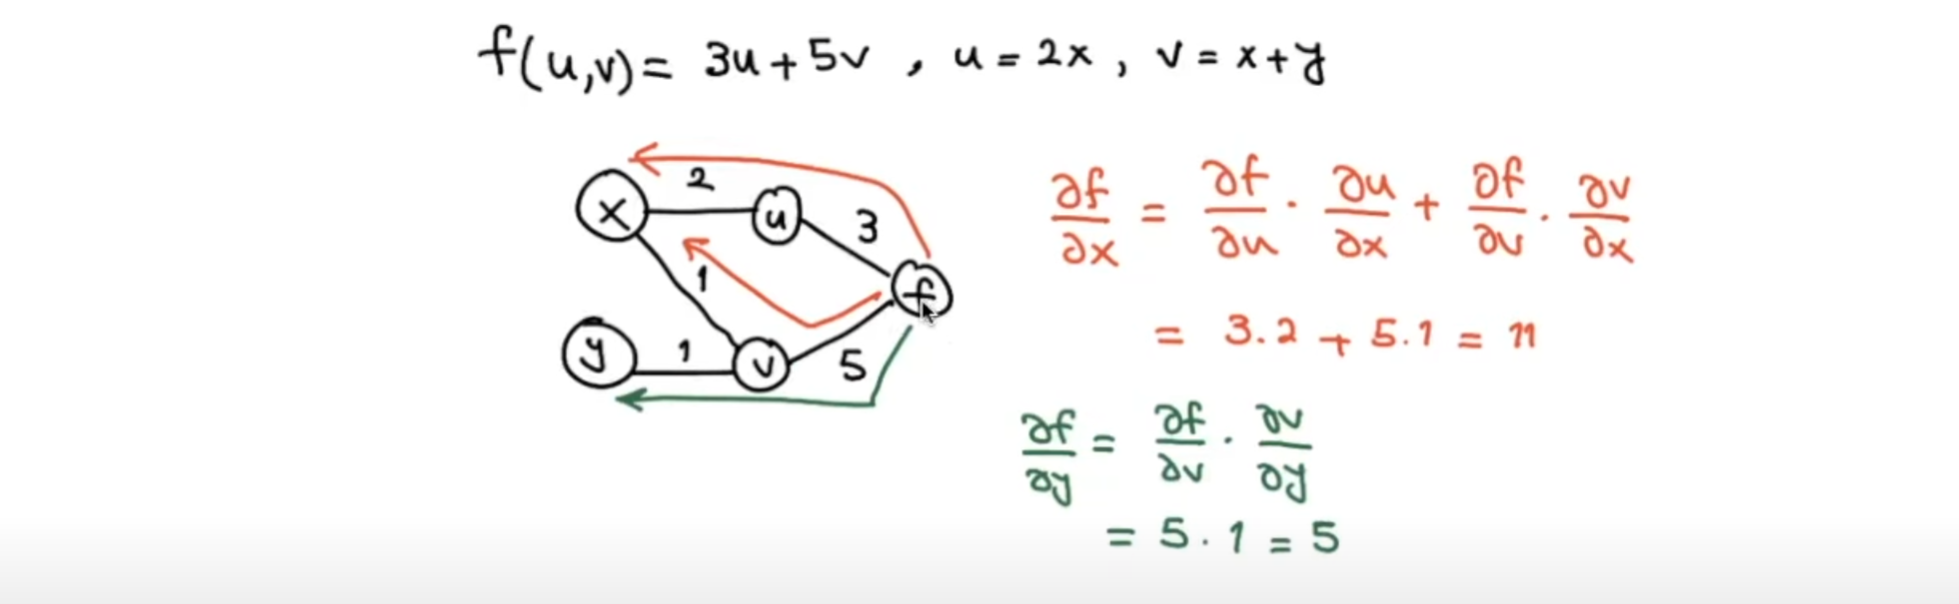

This example demonstrates the application of the chain rule in multivariable calculus. Let's break it down step by step:

1. Given function and variables:
   f(u,v) = 3u + 5v
   , u = 2x
   , v = x + y

2. The goal is to find partial derivatives of f with respect to x and y.

3. Finding ∂f/∂x:
   a) Apply the chain rule: ∂f/∂x = (∂f/∂u)(∂u/∂x) + (∂f/∂v)(∂v/∂x)
   b) Calculate each term:
      - ∂f/∂u = 3 (from the original function)
      - ∂u/∂x = 2 (from u = 2x)
      - ∂f/∂v = 5 (from the original function)
      - ∂v/∂x = 1 (from v = x + y)
   c) Substitute values: ∂f/∂x = 3 • 2 + 5 • 1 = 6 + 5 = 11

4. Finding ∂f/∂y:
   a) Apply the chain rule: ∂f/∂y = (∂f/∂v)(∂v/∂y)
      (Note: ∂u/∂y = 0, so that term disappears)
   b) Calculate each term:
      - ∂f/∂v = 5 (from the original function)
      - ∂v/∂y = 1 (from v = x + y)
   c) Substitute values: ∂f/∂y = 5 • 1 = 5

5. The diagram visualizes these relationships:
   - The path from x to f through u (red) represents ∂f/∂x
   - The path from y to f through v (green) represents ∂f/∂y

This process demonstrates how changes in x and y affect the function f through the intermediate variables u and v.

In [ ]:
# Define the function f(u, v)
def f(u, v):
    return 3 * u + 5 * v

# Define the relationships u(x) and v(x, y)
def u(x):
    return 2 * x

def v(x, y):
    return x + y

# Create variables
x = tf.Variable(2.0)
y = tf.Variable(3.0)


# Use GradientTape to calculate gradients
with tf.GradientTape() as tape:
    _u = u(x)
    _v = v(x, y)
    z = f(_u, _v)

# Calculate gradients
[df_dx, df_dy] = tape.gradient(z, [x, y])

print(f"∂f/∂x = {df_dx.numpy()}")
print(f"∂f/∂y = {df_dy.numpy()}")
    

#### 9. TensorFlow Functions for Performance Optimization

The `@tf.function` decorator in TensorFlow is used to create a graph-based execution of a Python function. Here's a concise explanation:

In [ ]:
@tf.function
def simple_function(x):
    return x * 2 + 1

result = simple_function(tf.constant(5.0))
print(result)

tf.Tensor(11.0, shape=(), dtype=float32)


#### 10. Define a simple linear regression model

Brief Summary of Linear Regression
Linear Regression is a very common statistical method that allows us to learn a function or relationship from a given set of continuous data.

For example, we are given some data points of x and corresponding y and we need to learn the relationship between them which is called a hypothesis.

In the case of Linear regression, the hypothesis is a straight line, i.e,
$${h(x) = wx + b}$$     
 Where w is a vector called Weights and b is a scalar called Bias. The Weights and Bias are called the parameters of the model.

All we need to do is estimate the value of w and b from the given set of data such that the resultant hypothesis produces the least cost J which is defined by the following cost function 
$${J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - h(x_i)) ^ 2}$$    
 where m is the number of data points in the given dataset. This cost function is also called Mean Squared Error.

For finding the optimized value of the parameters for which J is minimum, we will be using a commonly used optimizer algorithm called Gradient Descent. Following is the pseudo-code for Gradient Descent:

Repeat until Convergence
$${    w = w – α * δJ/δw }$$
$${b = b – α * δJ/δb}$$
where α is a hyperparameter called the Learning Rate.

In [ ]:
# installing amtplotlib for visualization
# ! pip install matplotlib

Epoch 0, Loss: 495.4221
Epoch 10, Loss: 0.3188
Epoch 20, Loss: 0.3125
Epoch 30, Loss: 0.3068
Epoch 40, Loss: 0.3016
Epoch 50, Loss: 0.2969
Epoch 60, Loss: 0.2927
Epoch 70, Loss: 0.2888
Epoch 80, Loss: 0.2853
Epoch 90, Loss: 0.2822


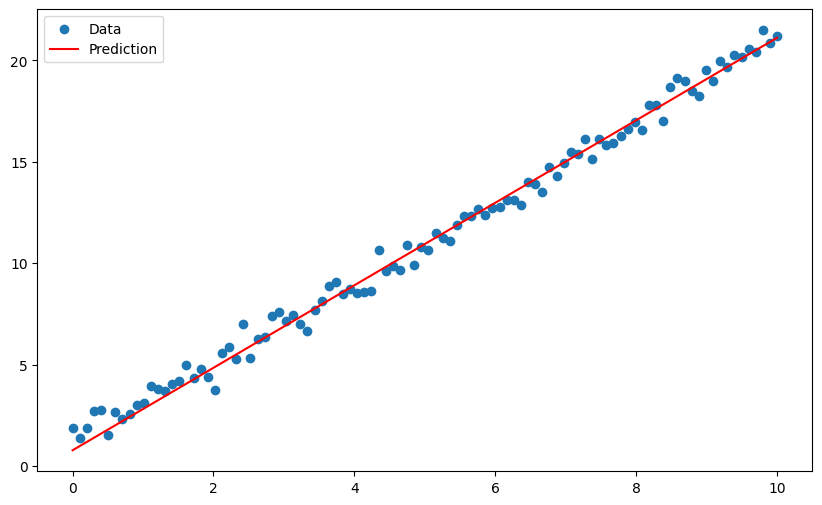

Learned parameters: w = 2.0344, b = 0.7766


In [72]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1).astype(np.float32)
y = (2 * X + 1 + np.random.randn(100, 1) * 0.5).astype(np.float32)

# Convert to TensorFlow tensors
X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)

# Define the model
class LinearRegression(tf.keras.Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.w = tf.Variable(tf.random.normal([1, 1], dtype=tf.float32))
        self.b = tf.Variable(tf.zeros([1], dtype=tf.float32))
    
    def call(self, x):
        return tf.matmul(x, self.w) + self.b

# Create the model and optimizer
model = LinearRegression()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training loop

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = tf.reduce_mean(tf.square(y - predictions))
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

epochs = 100  
for epoch in range(epochs):
    loss = train_step(X, y)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, model(X), color='red', label='Prediction')
plt.legend()
plt.show()

print(f"Learned parameters: w = {model.w.numpy()[0][0]:.4f}, b = {model.b.numpy()[0]:.4f}")

#### TensorFlow Sequential API

In [70]:
# Installing sklearn
# ! pip install scikit-learn

Training set shape: (800, 1)
Testing set shape: (200, 1)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1sthiddenlayer (Dense)      (None, 64)                128       
                                                                 
 2ndhiddenlayer (Dense)      (None, 32)                2080      
                                                                 
 Outputlayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 168.2982 - mean_absolute_error: 11.3855 - val_loss: 147.0054 - val_mean_absolute_error: 10.6965
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 129.1954 - mean_ab

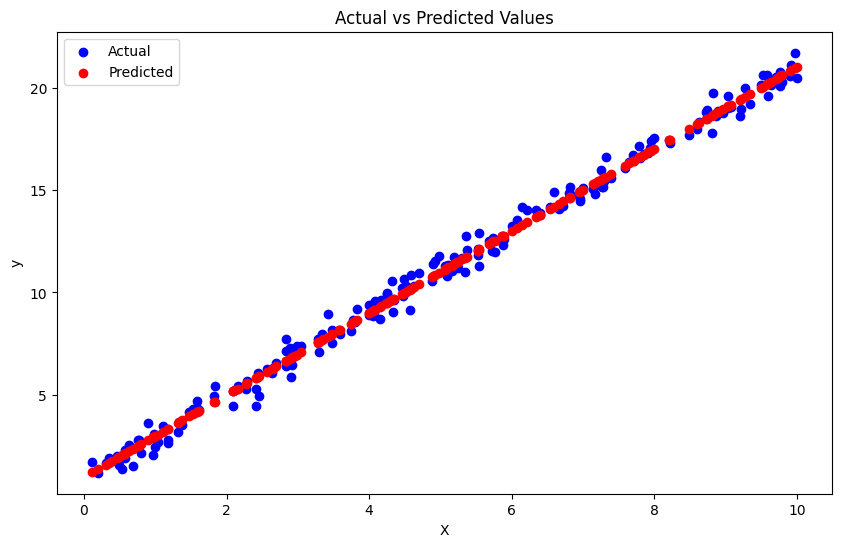

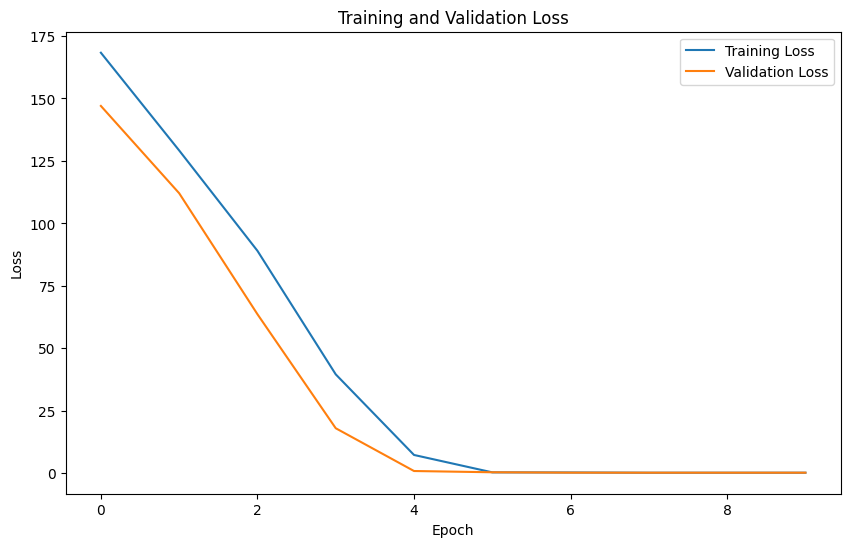

In [71]:
from sklearn.model_selection import train_test_split
# Generate synthetic data for regression
np.random.seed(0)
X = np.random.rand(1000, 1) * 10
y = 2 * X + 1 + np.random.randn(1000, 1) * 0.5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
# Adjust the model architecture to match input shape
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Change input shape to (1,)
    tf.keras.layers.Dense(64, activation="relu", name="1sthiddenlayer"),
    tf.keras.layers.Dense(32, activation="relu", name="2ndhiddenlayer"),
    tf.keras.layers.Dense(1, name="Outputlayer")  # Change output to 1 unit for regression
]) 

# Recompile the model
model.compile(
    optimizer="adam",
    loss='mean_squared_error',  # Change to MSE for regression
    metrics=['mean_absolute_error']  # Change metric to MAE for regression
)

# Print model summary
model.summary()

# Model training (Fitting)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model 
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#### TensorFlow Functional API

The Functional API allows you to create models with non-linear topology, shared layers, and multiple inputs or outputs. It treats layers as functions that can be called on tensors.

Training set shape: (800, 1)
Testing set shape: (200, 1)
Model: "Regression_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 1sthiddenlayer (Dense)      (None, 64)                128       
                                                                 
 2ndhiddenlayer (Dense)      (None, 32)                2080      
                                                                 
 Outputlayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
20/20 [==============================] - 1s 12ms/step - loss: 128.7984 - mean_absolute_error: 9.9603 - val_loss:

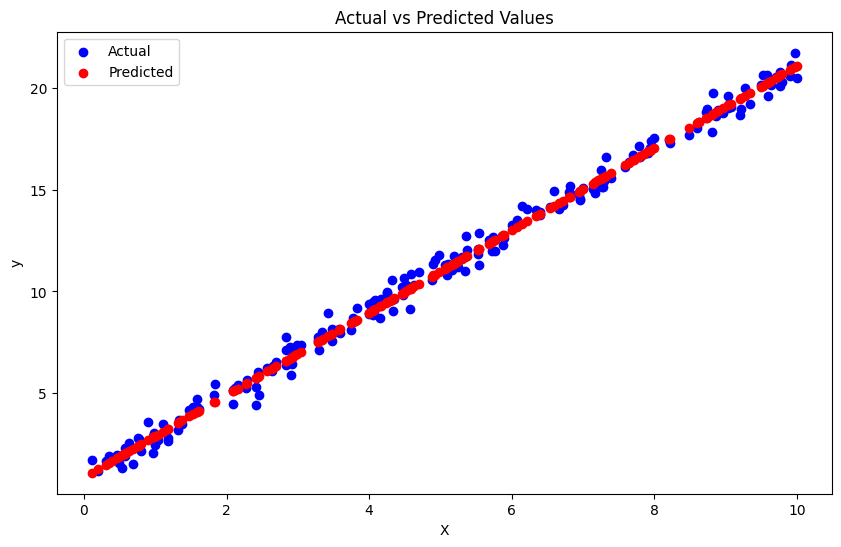

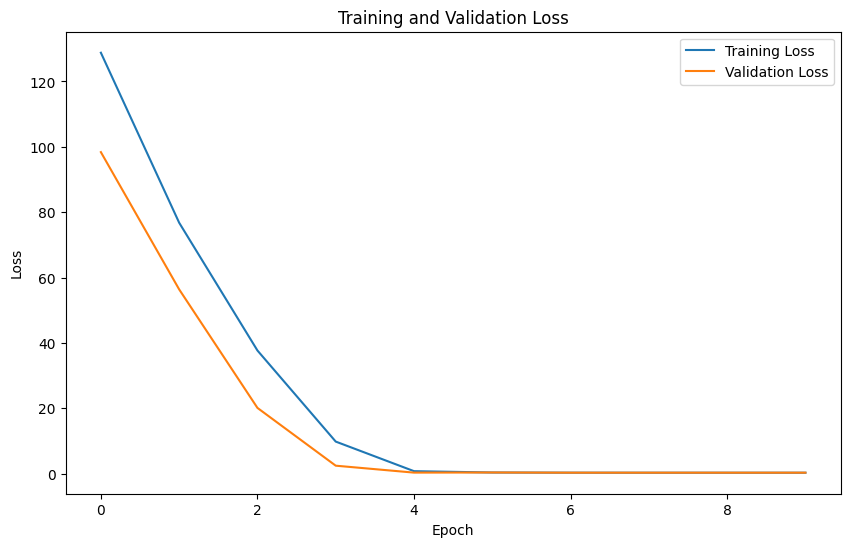

In [73]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data for regression
np.random.seed(0)
X = np.random.rand(1000, 1) * 10
y = 2 * X + 1 + np.random.randn(1000, 1) * 0.5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Define the model using Functional API
inputs = tf.keras.Input(shape=(1,))
x = tf.keras.layers.Dense(64, activation="relu", name="1sthiddenlayer")(inputs)
x = tf.keras.layers.Dense(32, activation="relu", name="2ndhiddenlayer")(x)
outputs = tf.keras.layers.Dense(1, name="Outputlayer")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="Regression_Model")

# Compile the model
model.compile(
    optimizer="adam",
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Print model summary
model.summary()

# Model training (Fitting)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model 
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### ___________________________________________________________________________________________________